1. 算法：可以说RMSpro是ADADELTA 的一个特例
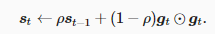
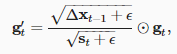

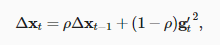
2. 代码实现

In [1]:
import torch
import dltools


def init_adadelta_states(feature_dim):
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    delta_w, delta_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        with torch.no_grad():
            s[:] = rho * s + (1 - rho) * torch.square(p.grad)
            g = (torch.sqrt(delta + eps) / torch.sqrt(s + eps)) * p.grad
            p[:] -= g
            delta[:] = rho * delta + (1 - rho) * g * g
        p.grad.data.zero_()

loss: 0.243, 0.034 sec/epoch


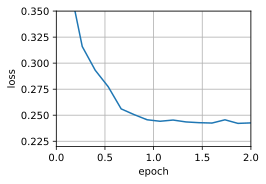

In [2]:
data_iter, feature_dim = dltools.get_data_ch11(batch_size=10)
dltools.train_ch11(adadelta, init_adadelta_states(feature_dim),{'rho': 0.9}, data_iter, feature_dim);

loss: 0.242, 0.034 sec/epoch


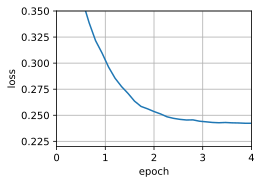

In [3]:
# 简洁版实现
trainer = torch.optim.Adadelta
dltools.train_concise_ch11(trainer, {'rho': 0.9}, data_iter)